In [62]:
import pandas as pd

In [63]:
train = pd.read_csv('data/train.csv', index_col='ID')
test = pd.read_csv('data/test.csv', index_col='ID')

In [64]:
train.drop('ADDRESS', axis=1, inplace=True)
test.drop('ADDRESS', axis=1, inplace=True)

In [65]:
train.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE               1.000000
FLOOR_AREA          0.539524
NEAREST_SCH_RANK    0.453937
BATHROOMS           0.386485
CBD_DIST            0.357368
BEDROOMS            0.256909
LONGITUDE           0.183514
POSTCODE            0.162925
BUILD_YEAR          0.148771
GARAGE              0.124276
NEAREST_STN_DIST    0.099370
LAND_AREA           0.046778
LATITUDE            0.046722
NEAREST_SCH_DIST    0.024030
Name: PRICE, dtype: float64

In [66]:
train.head(3)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ID,,,,,,,,,,,,,,,,,,
0,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0


In [67]:
sub_sortby_price = train[['SUBURB', 'PRICE']].groupby(by='SUBURB').mean().sort_values('PRICE', ascending=False)

sub_cols = sub_sortby_price.index

sub_dict = {}
for i, col in enumerate(sub_cols):
    sub_dict[col] = i + 1
    
train['SUBURB'] = train['SUBURB'].map(sub_dict)
test['SUBURB'] = test['SUBURB'].map(sub_dict)

In [68]:
train.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE               1.000000
SUBURB              0.728402
FLOOR_AREA          0.539524
NEAREST_SCH_RANK    0.453937
BATHROOMS           0.386485
CBD_DIST            0.357368
BEDROOMS            0.256909
LONGITUDE           0.183514
POSTCODE            0.162925
BUILD_YEAR          0.148771
GARAGE              0.124276
NEAREST_STN_DIST    0.099370
LAND_AREA           0.046778
LATITUDE            0.046722
NEAREST_SCH_DIST    0.024030
Name: PRICE, dtype: float64

In [69]:
stn_sortby_price = train[['NEAREST_STN', 'PRICE']].groupby(by='NEAREST_STN').mean().sort_values('PRICE', ascending=False)

stn_cols = stn_sortby_price.index

stn_dict = {}
for i, col in enumerate(stn_cols):
    sub_dict[col] = i + 1
    
train['NEAREST_STN'] = train['NEAREST_STN'].map(sub_dict)
test['NEAREST_STN'] = test['NEAREST_STN'].map(sub_dict)

In [70]:
train.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE               1.000000
SUBURB              0.728402
NEAREST_STN         0.581309
FLOOR_AREA          0.539524
NEAREST_SCH_RANK    0.453937
BATHROOMS           0.386485
CBD_DIST            0.357368
BEDROOMS            0.256909
LONGITUDE           0.183514
POSTCODE            0.162925
BUILD_YEAR          0.148771
GARAGE              0.124276
NEAREST_STN_DIST    0.099370
LAND_AREA           0.046778
LATITUDE            0.046722
NEAREST_SCH_DIST    0.024030
Name: PRICE, dtype: float64

In [71]:
test['SUBURB'] = test['SUBURB'].fillna(train['SUBURB'].mean())

In [72]:
train['DATE_SOLD'].head()

ID
0    09-2015\r
1    07-2018\r
2    02-2020\r
3    07-2020\r
4    10-2017\r
Name: DATE_SOLD, dtype: object

In [73]:
train['DATE_SOLD'][0][:2]
train['DATE_SOLD'][0][3:-1]

'2015'

In [74]:
def month_sold(date):
    return int(date[:2])

def year_sold(date):
    return int(date[3:-1])

In [75]:
train['MONTH_SOLD'] = train['DATE_SOLD'].apply(month_sold)
train['YEAR_SOLD'] = train['DATE_SOLD'].apply(year_sold)

In [76]:
test['MONTH_SOLD'] = test['DATE_SOLD'].apply(month_sold)
test['YEAR_SOLD'] = test['DATE_SOLD'].apply(year_sold)

In [77]:
train.drop('DATE_SOLD', axis=1, inplace=True)
test.drop('DATE_SOLD', axis=1, inplace=True)

In [78]:
train['YEAR_DIFF'] = train['YEAR_SOLD'] - train['BUILD_YEAR']
test['YEAR_DIFF'] = test['YEAR_SOLD'] - test['BUILD_YEAR']

In [79]:
train.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE               1.000000
SUBURB              0.728402
NEAREST_STN         0.581309
FLOOR_AREA          0.539524
NEAREST_SCH_RANK    0.453937
BATHROOMS           0.386485
CBD_DIST            0.357368
BEDROOMS            0.256909
LONGITUDE           0.183514
YEAR_DIFF           0.164383
POSTCODE            0.162925
BUILD_YEAR          0.148771
GARAGE              0.124276
NEAREST_STN_DIST    0.099370
YEAR_SOLD           0.084380
LAND_AREA           0.046778
LATITUDE            0.046722
NEAREST_SCH_DIST    0.024030
MONTH_SOLD          0.001545
Name: PRICE, dtype: float64

In [80]:
byb = train['BUILD_YEAR'].notnull()

tbyb = train[byb]

kk1 = tbyb['YEAR_SOLD'] - tbyb['BUILD_YEAR']

kk1.describe() # 건축 날짜보다 판 날짜가 먼저인것은 말이 안 된다. 빼자

byb = test['BUILD_YEAR'].notnull()

tbyb = test[byb]

kk2 = tbyb['YEAR_SOLD'] - tbyb['BUILD_YEAR']

kk2.describe() # 근데 test에도 그런게 있으니까 빼지 말자

count    13719.000000
mean        27.075297
std         20.931649
min        -23.000000
25%         12.000000
50%         22.000000
75%         38.000000
max        145.000000
dtype: float64

In [81]:
kk1.mean()

26.82081992611131

In [82]:
kk1.value_counts()

 12.0     537
 15.0     504
 13.0     495
 14.0     464
 11.0     460
         ... 
 123.0      1
 128.0      1
-12.0       1
 122.0      1
 147.0      1
Length: 145, dtype: int64

In [83]:
kk1.value_counts().index

Float64Index([ 12.0,  15.0,  13.0,  14.0,  11.0,  16.0,  10.0,  18.0,  17.0,
                6.0,
              ...
              -17.0, 130.0, 134.0, 129.0, -10.0, 123.0, 128.0, -12.0, 122.0,
              147.0],
             dtype='float64', length=145)

In [84]:
import matplotlib.pyplot as plt

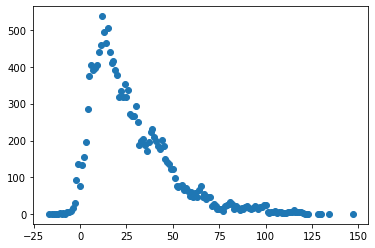

In [85]:
plt.scatter(kk1.value_counts().index, kk1.value_counts().values) # 12에서 최고점을 찍는 것을 볼 수 있다

In [86]:
# 판 연도에서 12년을 빼서 건축 연도의 결측치를 채우자
train['BUILD_YEAR'].fillna(train[train['BUILD_YEAR'].isnull()]['YEAR_SOLD'] - 12, inplace=True)
train['BUILD_YEAR'].isnull().sum()

0

In [87]:
test['BUILD_YEAR'].fillna(test[test['BUILD_YEAR'].isnull()]['YEAR_SOLD'] - 12, inplace=True)
test['BUILD_YEAR'].isnull().sum()

0

In [88]:
# GARAGE는 최빈값 2.0을 넣자
train['GARAGE'].fillna(2.0, inplace=True)
train['GARAGE'].isnull().sum()

0

In [89]:
# GARAGE는 최빈값 2.0을 넣자
test['GARAGE'].fillna(2.0, inplace=True)
test['GARAGE'].isnull().sum()

0

In [90]:
train.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE               1.000000
SUBURB              0.728402
NEAREST_STN         0.581309
FLOOR_AREA          0.539524
NEAREST_SCH_RANK    0.453937
BATHROOMS           0.386485
CBD_DIST            0.357368
BEDROOMS            0.256909
LONGITUDE           0.183514
YEAR_DIFF           0.164383
POSTCODE            0.162925
BUILD_YEAR          0.141895
GARAGE              0.121527
NEAREST_STN_DIST    0.099370
YEAR_SOLD           0.084380
LAND_AREA           0.046778
LATITUDE            0.046722
NEAREST_SCH_DIST    0.024030
MONTH_SOLD          0.001545
Name: PRICE, dtype: float64

In [91]:
train[['NEAREST_SCH', 'NEAREST_SCH_RANK']].groupby('NEAREST_SCH').mean().sort_values('NEAREST_SCH_RANK')

,NEAREST_SCH_RANK
NEAREST_SCH,
PERTH MODERN SCHOOL,1.0
ST HILDA'S ANGLICAN SCHOOL FOR GIRLS,2.0
CHRIST CHURCH GRAMMAR SCHOOL,3.0
PENRHOS COLLEGE,4.0
METHODIST LADIES' COLLEGE,5.0
...,...
TREETOPS MONTESSORI SCHOOL,NaN
WARNBRO COMMUNITY HIGH SCHOOL,NaN
WARWICK SENIOR HIGH SCHOOL,NaN


In [92]:
train.corr()['NEAREST_SCH_RANK'].abs().sort_values(ascending=False)

NEAREST_SCH_RANK    1.000000
SUBURB              0.500715
NEAREST_STN         0.477699
PRICE               0.453937
CBD_DIST            0.324407
LONGITUDE           0.244113
POSTCODE            0.190799
NEAREST_STN_DIST    0.184562
YEAR_DIFF           0.156272
NEAREST_SCH_DIST    0.155208
BUILD_YEAR          0.148622
FLOOR_AREA          0.136373
BATHROOMS           0.095940
LATITUDE            0.050500
YEAR_SOLD           0.035555
LAND_AREA           0.034244
BEDROOMS            0.029626
GARAGE              0.012876
MONTH_SOLD          0.002245
Name: NEAREST_SCH_RANK, dtype: float64

In [93]:
train.columns

Index(['SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
       'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH',
       'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'MONTH_SOLD', 'YEAR_SOLD',
       'YEAR_DIFF'],
      dtype='object')

In [94]:
sch = train[['SUBURB', 'PRICE', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'POSTCODE', 'LONGITUDE',
       'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK']]
sch.head()

,SUBURB,PRICE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,POSTCODE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ID,,,,,,,,,,,
0,273,520000,266,2007.0,35500,60,3000,6030,115.720566,1.079230,120.0
1,179,575000,301,2014.0,16900,32,8100,6065,115.867675,0.667585,NaN
2,97,760000,220,1992.0,33500,47,3500,6030,115.702600,0.650761,111.0
3,45,1230000,185,1938.0,3500,20,1500,6016,115.838181,0.484465,106.0
4,19,2010000,186,2004.0,12900,15,800,6159,115.759626,1.869050,25.0


In [95]:
sch_train = sch[sch['NEAREST_SCH_RANK'].notnull()]
sch_test = sch[sch['NEAREST_SCH_RANK'].isnull()][['SUBURB', 'PRICE', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'POSTCODE', 'LONGITUDE',
       'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK']]
sch_X = sch_train[['SUBURB', 'PRICE', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'POSTCODE', 'LONGITUDE',
       'NEAREST_SCH_DIST']]
sch_y = sch_train['NEAREST_SCH_RANK']

In [96]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr = HistGradientBoostingRegressor()

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
sch_result = cross_val_score(hgbr, sch_X, sch_y, cv=5)

In [99]:
print(sch_result)
print(sch_result.mean())

[0.91564856 0.91459235 0.91202149 0.91053646 0.90720606]
0.9120009820150685


In [100]:
hgbr.fit(sch_X, sch_y)

HistGradientBoostingRegressor()

In [101]:
sch_pre = hgbr.predict(sch_test[['SUBURB', 'PRICE', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'POSTCODE', 'LONGITUDE',
       'NEAREST_SCH_DIST']])

In [102]:
sch_test['NEAREST_SCH_RANK'] = sch_pre

In [103]:
train['NEAREST_SCH_RANK'].fillna(sch_test['NEAREST_SCH_RANK'], inplace=True)
train['NEAREST_SCH_RANK'].isnull().sum()

0

In [104]:
train[['NEAREST_SCH', 'NEAREST_SCH_RANK']].groupby('NEAREST_SCH').mean().sort_values('NEAREST_SCH_RANK')

,NEAREST_SCH_RANK
NEAREST_SCH,
PERTH MODERN SCHOOL,1.0
ST HILDA'S ANGLICAN SCHOOL FOR GIRLS,2.0
CHRIST CHURCH GRAMMAR SCHOOL,3.0
PENRHOS COLLEGE,4.0
METHODIST LADIES' COLLEGE,5.0
...,...
BALCATTA SENIOR HIGH SCHOOL,135.0
SAFETY BAY SENIOR HIGH SCHOOL,136.0
DARLING RANGE SPORTS COLLEGE,137.0


In [105]:
train['NEAREST_SCH_RANK'].head()

ID
0    120.000000
1     90.677551
2    111.000000
3    106.000000
4     25.000000
Name: NEAREST_SCH_RANK, dtype: float64

In [106]:
set(test['NEAREST_SCH']) - set(train['NEAREST_SCH'])

{'SOUTH METROPOLITAN YOUTH LINK COMMUNITY COLLEGE'}

In [107]:
train['NEAREST_SCH_RANK'].mean()

79.33131195838493

In [108]:
a = train[['NEAREST_SCH', 'NEAREST_SCH_RANK']]['NEAREST_SCH']
b = train[['NEAREST_SCH', 'NEAREST_SCH_RANK']]['NEAREST_SCH_RANK']

In [109]:
a[3]

'ARANMORE CATHOLIC COLLEGE'

In [110]:
ns_dict = {}

for i in range(len(a)):
    ns_dict[a[i]] = b[i]

In [111]:
ns_dict['SOUTH METROPOLITAN YOUTH LINK COMMUNITY COLLEGE'] = 79.11759390813363

In [112]:
test['NEAREST_SCH_RANK'] = test['NEAREST_SCH'].map(ns_dict)

In [113]:
train.drop('NEAREST_SCH', axis=1, inplace=True)
test.drop('NEAREST_SCH', axis=1, inplace=True)

In [114]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [115]:
hgbr = HistGradientBoostingRegressor()

In [116]:
from sklearn.model_selection import cross_val_score

y_train = train.pop('PRICE')
X_train = train

In [117]:
hgbr_result = cross_val_score(hgbr, X_train, y_train, cv=5)


print('hgbr_result:', hgbr_result)
print('hgbr_mean:', hgbr_result.mean())

hgbr_result: [0.83435716 0.85170919 0.86239263 0.84804383 0.84142807]
hgbr_mean: 0.8475861780192263


In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
# 스케일러 생성
scaler = StandardScaler()

# 현재 데이터의 분포 범위 확인
scaler.fit(X_train)

# 데이터 변환
tf_X_train = scaler.transform(X_train)
tf_test = scaler.transform(test)

In [120]:
hgbr_result = cross_val_score(hgbr, tf_X_train, y_train, cv=5)

print('hgbr_result:', hgbr_result)
print('hgbr_mean:', hgbr_result.mean())

hgbr_result: [0.82852278 0.84875062 0.85933797 0.85384863 0.84244222]
hgbr_mean: 0.8465804439049618


In [121]:
# 예측
hgbr.fit(X_train, y_train)
hgbr_pre = hgbr.predict(test)

# 답안지 파일 불러오기
result = pd.read_csv('data/sample_submission.csv')

# 예측값 초기화
result['PRICE'] = hgbr_pre

# df -> csv 저장
result.to_csv('try03_hgbr.csv', index=False)

In [122]:
hgbr2 = HistGradientBoostingRegressor()


# 예측
hgbr2.fit(tf_X_train, y_train)
hgbr2_pre = hgbr2.predict(tf_test)

# 답안지 파일 불러오기
result = pd.read_csv('data/sample_submission.csv')

# 예측값 초기화
result['PRICE'] = hgbr2_pre

# df -> csv 저장
result.to_csv('try03_hgbr2.csv', index=False)